In [5]:
!pip install nltk spacy matplotlib
!python -m nltk.downloader punkt stopwords wordnet punkt_tab
!python -m spacy download en_core_web_sm

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can 

In [2]:
text = """Canada is a country in North America. Its ten provinces and three territories extend from the Atlantic Ocean to the Pacific Ocean and northward into the Arctic Ocean, making it the world's second-largest country by total area, with the world's longest coastline. Its border with the United States is the longest international land border. The country is characterized by a wide range of both meteorologic and geological regions. With a population of over 41 million, it has widely varying population densities, with the majority residing in urban areas and large areas of the country being sparsely populated. Canada's capital is Ottawa and its three largest metropolitan areas are Toronto, Montreal, and Vancouver."""


In [3]:
import re

# Convert to lowercase
cleaned_text = text.lower()

# Remove punctuation and digits
cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)  # Remove punctuation
cleaned_text = re.sub(r'\d+', '', cleaned_text)      # Remove digits

# Remove extra whitespace
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

print("Cleaned Text:\n", cleaned_text)

Cleaned Text:
 canada is a country in north america its ten provinces and three territories extend from the atlantic ocean to the pacific ocean and northward into the arctic ocean making it the worlds secondlargest country by total area with the worlds longest coastline its border with the united states is the longest international land border the country is characterized by a wide range of both meteorologic and geological regions with a population of over million it has widely varying population densities with the majority residing in urban areas and large areas of the country being sparsely populated canadas capital is ottawa and its three largest metropolitan areas are toronto montreal and vancouver


In [6]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Sentence tokenization
sentences = sent_tokenize(text)
print("Tokenized Sentences:\n", sentences)

# Word tokenization
words = word_tokenize(cleaned_text)
print("\nTokenized Words:\n", words)

Tokenized Sentences:
 ['Canada is a country in North America.', "Its ten provinces and three territories extend from the Atlantic Ocean to the Pacific Ocean and northward into the Arctic Ocean, making it the world's second-largest country by total area, with the world's longest coastline.", 'Its border with the United States is the longest international land border.', 'The country is characterized by a wide range of both meteorologic and geological regions.', 'With a population of over 41 million, it has widely varying population densities, with the majority residing in urban areas and large areas of the country being sparsely populated.', "Canada's capital is Ottawa and its three largest metropolitan areas are Toronto, Montreal, and Vancouver."]

Tokenized Words:
 ['canada', 'is', 'a', 'country', 'in', 'north', 'america', 'its', 'ten', 'provinces', 'and', 'three', 'territories', 'extend', 'from', 'the', 'atlantic', 'ocean', 'to', 'the', 'pacific', 'ocean', 'and', 'northward', 'into', 

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

print("Word count before stopword removal:", len(words))
print("Word count after stopword removal:", len(filtered_words))
print("Filtered Words:\n", filtered_words)

Word count before stopword removal: 111
Word count after stopword removal: 64
Filtered Words:
 ['canada', 'country', 'north', 'america', 'ten', 'provinces', 'three', 'territories', 'extend', 'atlantic', 'ocean', 'pacific', 'ocean', 'northward', 'arctic', 'ocean', 'making', 'worlds', 'secondlargest', 'country', 'total', 'area', 'worlds', 'longest', 'coastline', 'border', 'united', 'states', 'longest', 'international', 'land', 'border', 'country', 'characterized', 'wide', 'range', 'meteorologic', 'geological', 'regions', 'population', 'million', 'widely', 'varying', 'population', 'densities', 'majority', 'residing', 'urban', 'areas', 'large', 'areas', 'country', 'sparsely', 'populated', 'canadas', 'capital', 'ottawa', 'three', 'largest', 'metropolitan', 'areas', 'toronto', 'montreal', 'vancouver']


In [8]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sample_words = filtered_words[:10]

print("Original | Stemmed | Lemmatized")
for word in sample_words:
    print(f"{word:10} | {stemmer.stem(word):10} | {lemmatizer.lemmatize(word):10}")

Original | Stemmed | Lemmatized
canada     | canada     | canada    
country    | countri    | country   
north      | north      | north     
america    | america    | america   
ten        | ten        | ten       
provinces  | provinc    | province  
three      | three      | three     
territories | territori  | territory 
extend     | extend     | extend    
atlantic   | atlant     | atlantic  


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


POS Tag Frequencies:
 Counter({'NN': 21, 'JJ': 15, 'NNS': 10, 'JJS': 4, 'CD': 3, 'RB': 3, 'VBG': 3, 'VBP': 2, 'VBD': 2, 'IN': 1})


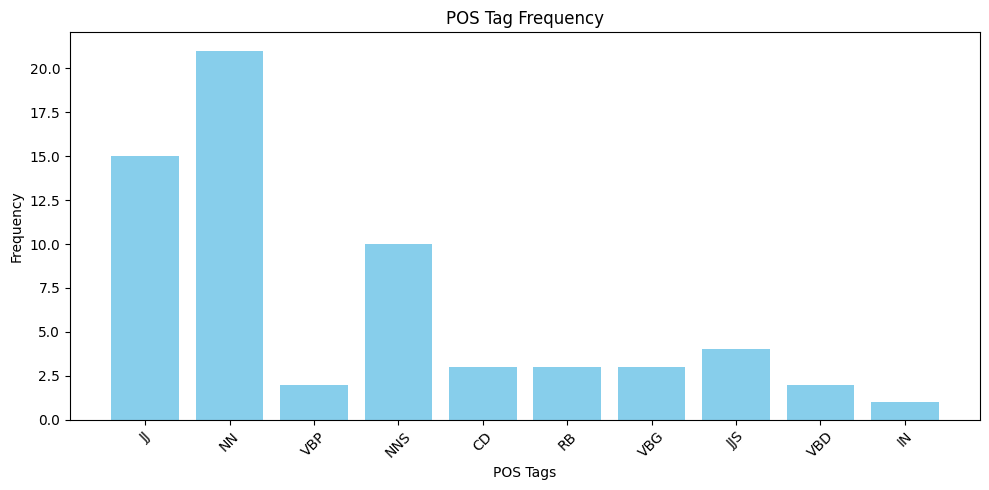

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(filtered_words)
tag_counts = Counter(tag for word, tag in pos_tags)

# Display top POS tags
print("POS Tag Frequencies:\n", tag_counts)

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title('POS Tag Frequency')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [13]:
import spacy
from spacy import displacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Named Entities:\n", entities)

# Visualize using displacy
displacy.render(doc, style="ent", jupyter=True)

Named Entities:
 [('Canada', 'GPE'), ('North America', 'LOC'), ('ten', 'CARDINAL'), ('three', 'CARDINAL'), ('the Atlantic Ocean', 'LOC'), ('the Pacific Ocean', 'LOC'), ('the Arctic Ocean', 'LOC'), ('second', 'ORDINAL'), ('the United States', 'GPE'), ('over 41 million', 'CARDINAL'), ('Canada', 'GPE'), ('Ottawa', 'GPE'), ('three', 'CARDINAL'), ('Toronto', 'GPE'), ('Montreal', 'GPE'), ('Vancouver', 'GPE')]
